In [1]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

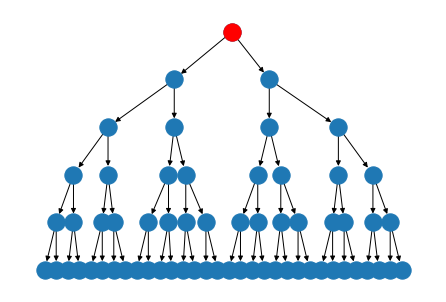

In [15]:
offspring_factor=2
height=5
H=nx.generators.classic.balanced_tree(offspring_factor,height)
root=utils.list_degree_nodes(H,offspring_factor,1)[0]
H,_=utils.directify(H,root)
pos=graphviz_layout(H,prog='dot')
nx.draw(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r')
plt.show()

In [16]:
#G=utils.random_dag(10,20)
#root=np.random.choice(utils.sources(G))pos=graphviz_layout(G,prog='dot')
#nx.draw(G,pos)
#nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
#plt.show()

In [17]:
def show_pattern_deco(func):
    def wrapper(*args,**kwargs):
        out = func(*args,**kwargs)
        print(args,'-->\n',out)
        return out
    return wrapper
#rw.mutate_pattern=show_pattern_deco(rw.mutate_pattern)

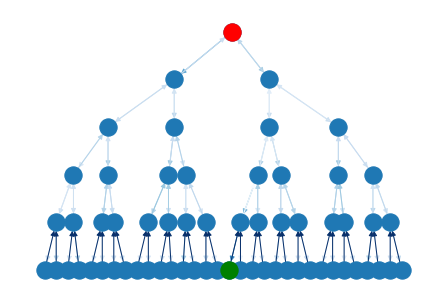

In [18]:
G=rw.patternWalker(H,root,15,0.2)
G.set_weights()
pos=graphviz_layout(G,prog='dot')
(edges,weights) = zip(*nx.get_edge_attributes(G,'prob').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g')
plt.show()

In [19]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
mfpts=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')
print(G.target_node)
mfpts


Number of duplicate strings/Number of strings: 3 / 63
47


{(0, 31): (123.3869841269963+0j),
 (0, 32): (123.38698412699601+0j),
 (0, 33): (122.88698412699604+0j),
 (0, 34): (122.88698412699614+0j),
 (0, 35): (123.29333333334516+0j),
 (0, 36): (123.29333333334502+0j),
 (0, 37): (124.24571428572605+0j),
 (0, 38): (124.24571428572614+0j),
 (0, 39): (116.83176587302766+0j),
 (0, 40): (116.83176587302779+0j),
 (0, 41): (117.14922619048833+0j),
 (0, 42): (117.1492261904881+0j),
 (0, 43): (120.70894179895436+0j),
 (0, 44): (120.70894179895426+0j),
 (0, 45): (119.10894179895426+0j),
 (0, 46): (119.10894179895432+0j),
 (0, 47): (314.6506781644449+0j),
 (0, 48): (314.6506781644449+0j),
 (0, 49): (302.4840114977769+0j),
 (0, 50): (302.4840114977769+0j),
 (0, 51): (274.3560353072976+0j),
 (0, 52): (274.35603530729753+0j),
 (0, 53): (274.0703210215829+0j),
 (0, 54): (274.07032102158297+0j),
 (0, 55): (188.32324379325024+0j),
 (0, 56): (188.32324379325044+0j),
 (0, 57): (187.8446113146177+0j),
 (0, 58): (187.84461131461777+0j),
 (0, 59): (193.43488603989056

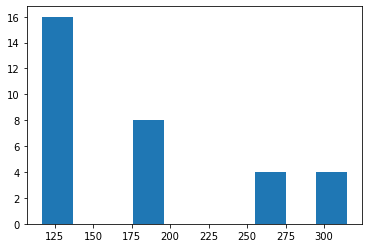

In [20]:
_=plt.hist(mfpts.values())

In [47]:
mfpts=[]
down_c=[]
up_c=[]
for _ in range(200):
    G.reset_patterns()
    G.set_weights()
    t_temp=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')
    d_temp=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
    u_temp=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
    for x in t_temp.values():
        mfpts.append(x)
    for x in d_temp:
        down_c.append(x)
    for x in u_temp:
        up_c.append(x)

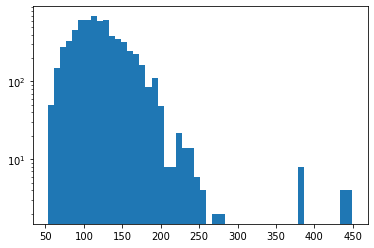

In [48]:
_=plt.hist(mfpts,bins=50)
plt.yscale('log')
#plt.xscale('log')
plt.show()

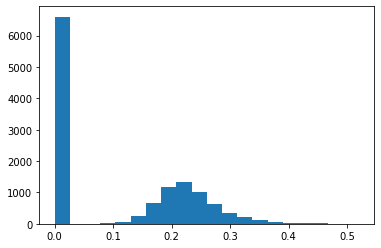

In [51]:
#down=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
#print(down)
_=plt.hist(down_c,bins=20)
plt.show()

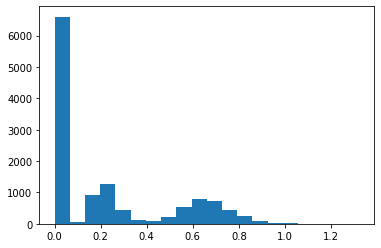

In [52]:
#up=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
#print(up)
_=plt.hist(up_c,bins=20)
plt.show()